<center>
<img src="logo.png" height="900"> 
</center>


#  НесмУщённый и состоятельный записыватель курсов

__Это задание является дополнительным и необязательным для решения.__ 

Филипп записывает онлайн-курс по статистике. Он ориентируется на то, что каждая неделя курса должна идти около $100$ минут. В голове у Филиппа есть оцениватель времени. Он оценивает по длительности каждое видео и записыват свои прикидки на бумагу. Когда видео снято, Филипп смотрит как долго оно длилось и записывает итоговый результат на бумагу. В таблице `filipp_course.tsv` представлены записи Филиппа за $11$ отснятых недель. 

__Описание колонок:__

- `real_week` - хронологический номер недели
- `week` - какой по порядку записывалась неделя
- `type` - тип видео (доска, презентация, код)
- `estimate_time` - во сколько минут Филипп оценил время видео при разработке материала
- `real_time` - сколько реально длится это видео


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("filipp_course.tsv", sep='\t')
print(df.shape)
df.head()

(129, 5)


,real_week,week,type,estimate_time,real_time
0,6,1,blackboard,6,11.0
1,6,1,blackboard,10,7.0
2,6,1,blackboard,10,11.5
3,6,1,blackboard,5,6.0
4,6,1,presentation,5,3.0


Будем считать, что на протяжении всей записи у Филиппа в голове был один и тот же оцениватель (estimator). По этому оценивателю Филипп делал точечные оценки для каждого видео независимо друг от друга. Давайте поисследуем оцениватель Филиппа на различные статистические свойства.

__а)__ Посчитайте разницу между `estimate_time` и `real_time`. Запишите её в новую колонку `bias`. Это то, насколько каждая оценка Филиппа оказалась смещена. Посчитайте среднее смещение, запишите его в переменную `bias_mean`. Проинтерпретируйте получившееся число. Правда ли, что Филипп делает несмещённые оценки?

In [2]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
df['bias'] = df['estimate_time'] - df['real_time']

bias_mean = df['bias'].mean()

# your code here
df.head()

,real_week,week,type,estimate_time,real_time,bias
0,6,1,blackboard,6,11.0,-5.0
1,6,1,blackboard,10,7.0,3.0
2,6,1,blackboard,10,11.5,-1.5
3,6,1,blackboard,5,6.0,-1.0
4,6,1,presentation,5,3.0,2.0


In [3]:
# проверка того, что задание решено верно (задание необязательно - все тесты открыты)
assert np.abs(bias_mean  + 2.179) < 1e-2


__б)__ Посчитайте среднее смещение, которое делает Филипп для каждого типа контента. Для какого типа смещение оказывается самым низким? Запишите его в переменную `bias_min`. 

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

bias_min = df.groupby('type').bias.mean().min()

# your code here


In [12]:
# проверка того, что задание решено верно
assert bias_min  + 1.47 < 1e-2


__в)__ Посмотрим как оцениватель Филиппа ведёт себя в динамике. Посчитайте среднее смещение для каждой недели. Как оно ведёт себя в динамике? Правда ли, что оно постепенно сходится к нулю? Чем поведение смещения в динамике отличается от асимптотической несмещённости? 

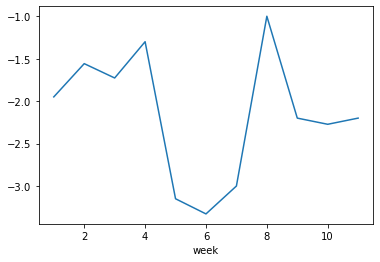

In [15]:
df.groupby('week').bias.mean().plot()

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here


__г)__ Несмещённость - это свойство при фиксированном $n$. Состоятельность - свойство при $n \to \infty$. Представим себе, что Филипп переосмыслил свою стратегию оценки времени, которое он тратит на запись видео. Теперь он хочет оценивать время на запись следующего видео как среднее, посчитанное по всем видео, записанным ранее.

_Например:_ Филипп записал три видео: 

- презентация 4 минуты
- презентация 1 минута
- доска 4 минуты

Тогда он оценить веремя на следующее видео как $\frac{4 + 1 + 4}{3} = 3$. Создайте в табличке колонку `new_estimate` с такми оценками. Время на первое видео он оценивает как $6$ минут. Посмотрите как себя ведёт такая оценка в динамике. Как думаете, к чему она сходится по вероятности? Какой физический смысл стоит за такой оценкой? 

In [20]:
new_estimate = np.zeros(len(df))
new_estimate[0] = 6

In [27]:
for i in range(1, len(df)):
    new_estimate[i] = df.iloc[0:i]['real_time'].mean()

In [29]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
df['new_estimate'] = new_estimate
# your code here


__д)__ Посчитайте для каждого видео смещение. По аналогии с пунктом __а)__ найдите среднее смещение. Запишите его в переменную `bias_mean_new`. Стало ли оно меньше благодаря новому оценивателю? Почему? 

In [31]:
df['new_bias'] = df['new_estimate'] - df['real_time']

In [32]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

bias_mean_new = df['new_bias'].mean()

# your code here


In [33]:
# проверка того, что задание решено верно
assert np.abs(bias_mean_new  + 0.609) < 1e-2


__е)__ Как Филипп мог бы использовать полученную в этом задании информацию, __чтобы стать лучше__? Сформулируйте для Филиппа несколько дельных советов. 